# Importing necessary libraries and dependencies


In [1]:
from tensorflow.python.ops.control_flow_ops import case_v2
from IPython.lib.display import isfile
import numpy as np
import os
from google.colab.patches import cv2_imshow
import cv2
import matplotlib as plt
import tensorflow as tf

### Since I was using Google Colab, it was conviniet for me to upload the dataset in my drive and use it's directory to import it in this program

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### The "data_dir" is a string variable that you change to your liking depending on where the downloaded dataset is located. You can simply copy the folder path and paste it here.

In [3]:
data_dir = "/content/drive/MyDrive/JuniorIS/NepaliCharacters/nhcd/nhcd/numerals"
BATCH_SIZE = 32
IMG_SIZE = (28,28) #Image size should be of width = 28 and length = 28
dataset = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                                      shuffle = True,
                                                      batch_size= BATCH_SIZE,
                                                      image_size= IMG_SIZE)


Found 2880 files belonging to 10 classes.


### Install split_folders to split folders for training and validation dataset

In [4]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders
splitfolders.ratio(data_dir, output = "/content/output1", seed = 1337, ratio = (0.8, 0.1, 0.1)) #creating a new folder "output1 to store our training, validation and test cases"

Copying files: 2880 files [00:49, 58.25 files/s] 


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import validation

In [7]:
train_dir = "/content/output1/train"
validation_dir = "/content/output1/val"
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle = True,
                                                            batch_size= BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle= True,
                                                                 batch_size= BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2300 files belonging to 10 classes.
Found 280 files belonging to 10 classes.


### Displaying some of the images with their classes

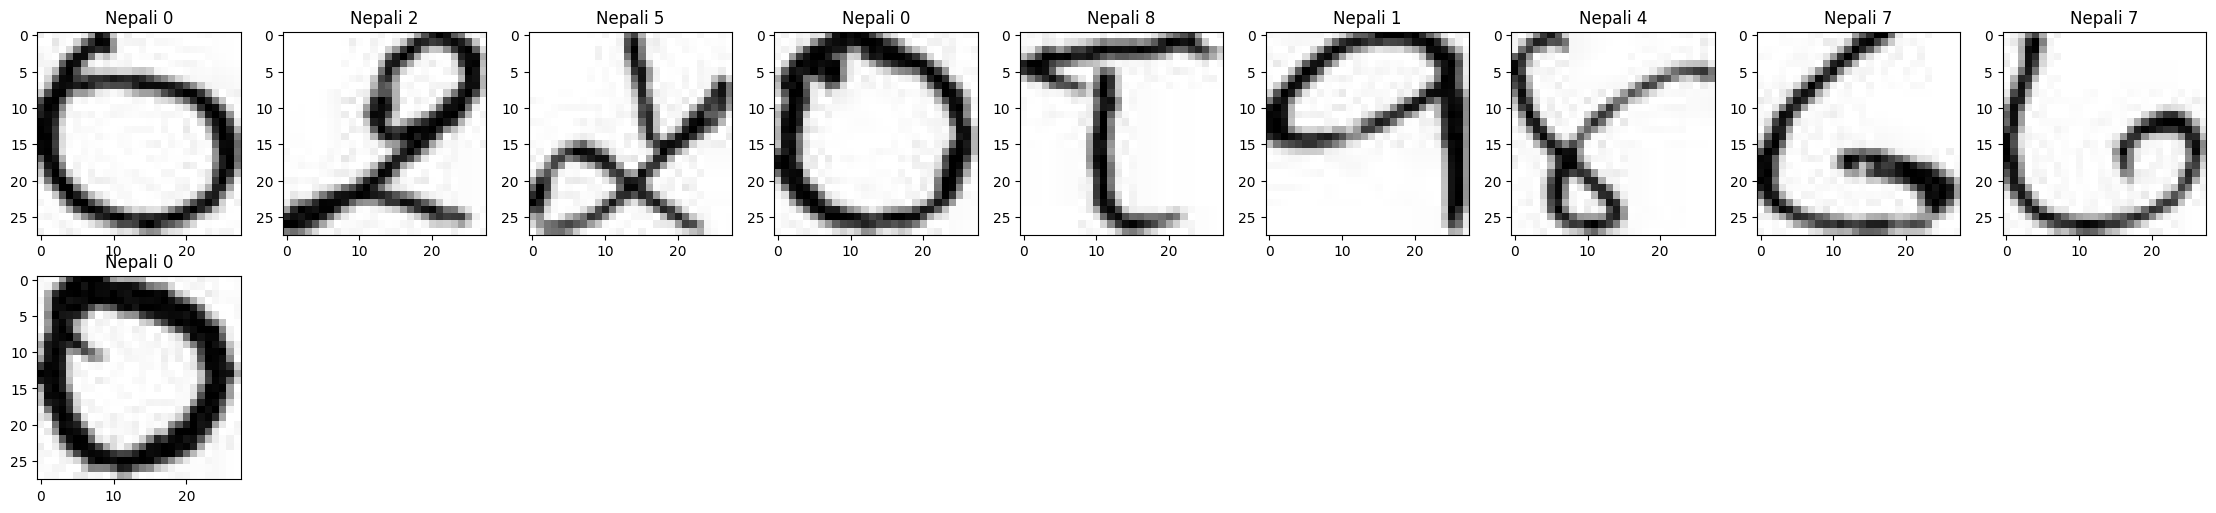

In [72]:
import matplotlib.pyplot as plt
class_names = train_dataset.class_names

plt.figure(figsize = (28,28))
x = 10
for images, labels in train_dataset.take(1):
  for i in range(x):
    axi = plt.subplot(x-1,x-1,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

#### We will now divide our dataset with 80% of the images used for training and 20% for validation. This is a good balance as suggested by Tensorflow.

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 2880 files belonging to 10 classes.
Using 2304 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 2880 files belonging to 10 classes.
Using 576 files for validation.


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #train_ds.cache saves the data in the memory after the first epoch
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Using Convolutional Neural Network with Conv2d, Maxpooling, Flatten and Dense for accurate training and prediction.

In [13]:
from keras.layers.attention.multi_head_attention import activation
model_nepali = tf.keras.Sequential()
model_nepali.add(tf.keras.layers.Rescaling(1./255, input_shape = (28,28,3)))
model_nepali.add(tf.keras.layers.Conv2D(16,3, padding = 'same', activation='relu'))
model_nepali.add(tf.keras.layers.MaxPooling2D())
model_nepali.add(tf.keras.layers.Conv2D(32, 3, padding = 'same', activation='relu'))
model_nepali.add(tf.keras.layers.MaxPooling2D())
model_nepali.add(tf.keras.layers.Conv2D(64, 3, padding = 'same', activation='relu'))
model_nepali.add(tf.keras.layers.MaxPooling2D())
model_nepali.add(tf.keras.layers.Flatten())
model_nepali.add(tf.keras.layers.Dense(128, activation= 'relu'))
model_nepali.add(tf.keras.layers.Dense(128, activation= 'relu'))
model_nepali.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_nepali.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_nepali.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [14]:
epochs=20
history_nepali = model_nepali.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
72/72 [==============================] - 7s 45ms/step - loss: 1.6876 - accuracy: 0.4319 - val_loss: 0.6363 - val_accuracy: 0.8108
Epoch 2/20
72/72 [==============================] - 2s 34ms/step - loss: 0.4285 - accuracy: 0.8576 - val_loss: 0.3986 - val_accuracy: 0.8733
Epoch 3/20
72/72 [==============================] - 5s 71ms/step - loss: 0.2033 - accuracy: 0.9319 - val_loss: 0.2551 - val_accuracy: 0.9115
Epoch 4/20
72/72 [==============================] - 6s 79ms/step - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.1664 - val_accuracy: 0.9392
Epoch 5/20
72/72 [==============================] - 6s 86ms/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.1371 - val_accuracy: 0.9497
Epoch 6/20
72/72 [==============================] - 5s 75ms/step - loss: 0.0345 - accuracy: 0.9905 - val_loss: 0.1137 - val_accuracy: 0.9635
Epoch 7/20
72/72 [==============================] - 9s 120ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.1654 - val_accuracy: 0.9444
Epoch 8/20
7

#### Saving the model as Model_Nepali

In [ ]:
model_nepali.save('Model_Nepali')

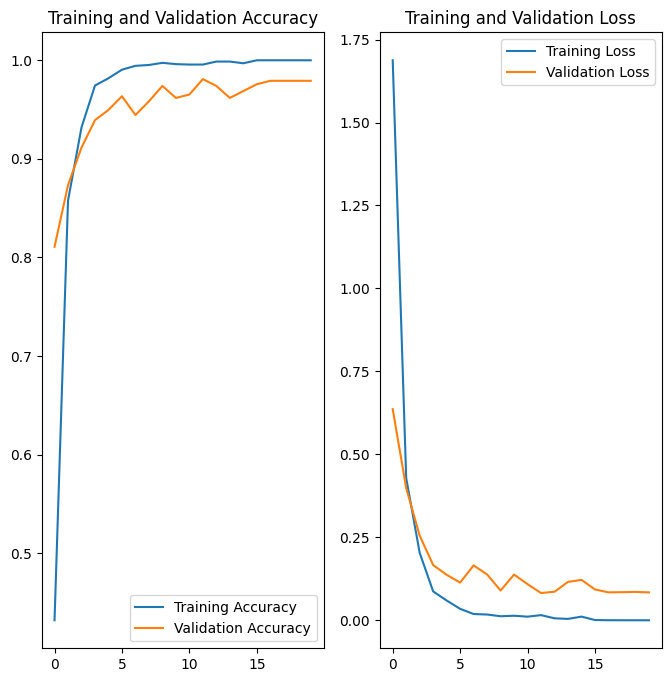

In [15]:
acc = history_nepali.history['accuracy']
val_acc = history_nepali.history['val_accuracy']

loss = history_nepali.history['loss']
val_loss = history_nepali.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Installing Gradiio for a frontend

In [19]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 

In [37]:
import gradio as gr
import requests
def classify_image(inp):
  
  img_array = tf.keras.utils.img_to_array(inp)
  img_array = tf.expand_dims(img_array, 0)
  prediction_from_nepali = model_nepali.predict(img_array)
  nepali_score = tf.nn.softmax(prediction_from_nepali[0])
  print("Nepali Score: {}" .format(nepali_score))
  return "This image is most probably of {}. " .format(class_names[np.argmax(nepali_score)]) #returns a string that classifies which nepali number is the input text image.

## You can test out different images from any files in your Computer with the use of gradio's UI. However this only works for Nepali model for me hence, this will only classify the input text image among the Nepali dataset classes and not English dataset. After using this stop the running of this block as not doing so will result in the codes following this to not run.

In [38]:
image = gr.inputs.Image(shape=(28,28))
label = gr.outputs.Label(num_top_classes=2)


gr.Interface(fn = classify_image, 
             inputs=gr.Image(shape=(28,28)),
             outputs=label,
             ).launch(debug = "True")

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step
Nepali Score: [0.08541925 0.08535784 0.08535784 0.08535791 0.0853597  0.08535784
 0.08536037 0.23163526 0.08535784 0.08543614]
1/1 [==============================] - 0s 24ms/step
Nepali Score: [0.08537869 0.08537848 0.08537848 0.08537848 0.08537848 0.08537848
 0.08537848 0.08537848 0.23130737 0.08566448]
1/1 [==============================] - 0s 127ms/step
Nepali Score: [0.08533678 0.08533689 0.0853368  0.08533678 0.08533683 0.0853368
 0.08533678 0.08533678 0.08533678 0.23196883]
Keyboard interruption in main thread... closing server.


## Importing MNIST dataset with the help of Tensorflow for dataset of handwritten numerals of the English Language

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11490434/11490434 [==============================] - 1s 0us/step


### The following code tells us that they have 60000 images of 28 * 28 dimensions to train which is more than ten times what the nepali numerals dataset contain.

In [17]:
x_train.shape

(60000, 28, 28)

## Pre-Processing

In [41]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Few different variations of model building process that I carried out before coming to the one that is the most suitable one

In [ ]:
# from keras.layers.attention.multi_head_attention import activation
# model_english = tf.keras.models.Sequential()
# # model_english.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# # model_english.add(tf.keras.layers.Dense(128, activation='relu'))
# # model_english.add(tf.keras.layers.Dense(128, activation='relu'))
# # model_english.add(tf.keras.layers.Dense(10, activation='softmax'))

#model_english.add(tf.keras.layers.Rescaling(1./255, input_shape = (28,28,1)))
# model_english.add(tf.keras.layers.Conv2D(28,3, padding = 'same', activation='relu'))
# model_english.add(tf.keras.layers.MaxPooling2D())
#model_english.add(tf.keras.layers.Conv2D(32, 3, padding = 'same', activation='relu'))
#model_english.add(tf.keras.layers.MaxPooling2D())
#model_english.add(tf.keras.layers.Conv2D(64, 3, padding = 'same', activation='relu'))
#model_english.add(tf.keras.layers.MaxPooling2D())
# model_english.add(tf.keras.layers.Flatten(input_shape = (28,28)))
# model_english.add(tf.keras.layers.Dense(128, activation='relu'))
# model_english.add(tf.keras.layers.Dense(128, activation='relu'))
# model_english.add(tf.keras.layers.Dense(10, activation='softmax'))

# # model_english.add(tf.keras.layers.Conv2D(18,4, padding = 'same', activation='relu'))
# # model_english.add(tf.keras.layers.MaxPooling2D())
# # model_english.add(tf.keras.layers.Conv2D(32, 4, padding = 'same', activation='relu'))
# # model_english.add(tf.keras.layers.MaxPooling2D())
# # model_english.add(tf.keras.layers.Conv2D(64, 4, padding = 'same', activation='relu'))
# # model_english.add(tf.keras.layers.MaxPooling2D())
# # #model_english.add(tf.keras.layers.Flatten())
# # model_english.add(tf.keras.layers.Dense(128, activation= 'relu'))
# # model_english.add(tf.keras.layers.Dense(128, activation= 'relu'))
# # #model.add(tf.keras.layers.Dense())
# # model_english.add(tf.keras.layers.Dense(10, activation = 'softmax'))
# model_english.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # model_english = tf.keras.models.Sequential([
# #   tf.keras.layers.Flatten(input_shape=(28, 28)),
# #   tf.keras.layers.Dense(128, activation='relu'),
# #   tf.keras.layers.Dense(10)
# # ])
# # model_english.compile(
# #     optimizer=tf.keras.optimizers.Adam(0.001),
# #     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# #     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# # )
#model_english.summary()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D())
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(128, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation=tf.nn.softmax))

In [70]:
model_english = tf.keras.models.Sequential()

model_english.add(tf.keras.layers.Conv2D(28, 4, padding = 'same', activation='relu'))
model_english.add(tf.keras.layers.MaxPooling2D())
model_english.add(tf.keras.layers.Flatten())
model_english.add(tf.keras.layers.Flatten(input_shape=(-1,28, 28,3)))
model_english.add(tf.keras.layers.Dense(128, activation='relu'))
model_english.add(tf.keras.layers.Dense(128, activation='relu'))
model_english.add(tf.keras.layers.Dense(10, activation='softmax'))
model_english.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_eng= model_english.fit(x_train, y_train, epochs=20)
#model.save('language_recognition.model')

#model = tf.keras.models.load_model('language_recognition.model')
loss, accuracy = model_english.evaluate(x_test, y_test)

print(loss)
print(accuracy)

Epoch 1/20
1875/1875 [==============================] - 54s 28ms/step - loss: 1.1976 - accuracy: 0.5834
Epoch 2/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5678 - accuracy: 0.8259
Epoch 3/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4097 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3284 - accuracy: 0.9024
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2889 - accuracy: 0.9136
Epoch 6/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2592 - accuracy: 0.9222
Epoch 7/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2362 - accuracy: 0.9283
Epoch 8/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2184 - accuracy: 0.9335
Epoch 9/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2027 - accuracy: 0.9385
Epoch 10/20
1875/1875 [==============================] - 55s 29m

### Running the program with image located in "img_path" and classifying whether it is a Nepali numeral and English numeral while also printing out it's probability.

#### Saving the model as Model_English

In [ ]:
model_english.save('Model_English')

In [71]:
from keras.utils.image_utils import img_to_array
img_path = "/content/digit4.png" #change the img_path any image path in your environment. 
img = cv2.imread("{}" .format(img_path))[:,:,0]

img1 = cv2.imread("{}".format(img_path))
#img = np.invert(np.array([img]))
img = np.invert(np.array([img]))
img_array = tf.keras.utils.img_to_array(img1)
img_array = tf.expand_dims(img_array, 0)
prediction_from_Nepali = model_nepali.predict(img_array)
prediction_from_English = model_english.predict(img)
# print(prediction_from_English)
# print(prediction_from_Nepali*100)
Nepali_score = tf.nn.softmax(prediction_from_Nepali)
English_score = tf.nn.softmax(prediction_from_English)
#print("English Score: {}" .format(English_score) )
#print("Nepali Score: {}" .format(Nepali_score))
print("Highest probability from Nepali number digit {}'s probability is {}".format(np.argmax(prediction_from_Nepali),np.max(prediction_from_Nepali)))
print("Highest probability from English number digit {}'s probability is {}".format(np.argmax(prediction_from_English), np.max(prediction_from_English)))
if(np.max(prediction_from_Nepali)) > (np.max(prediction_from_English)):
  print("This image most probably is of {} in Nepali" .format(class_names[np.argmax(Nepali_score)]))
else:
  print("This image most probably is of {} in English" .format(np.argmax(prediction_from_English)))
cv2_imshow(img[0])


1/1 [==============================] - 0s 82ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[1.6893544e-10 8.9389067e-07 1.6529867e-02 1.0696170e+00 7.2261391e+00
  1.3767385e+00 9.0276627e+01 1.4128623e-04 8.1634221e-07 3.4213599e-02]]
English Score: [[0.08533674 0.08533674 0.08533674 0.08533674 0.23196931 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]
Nepali Score: [[0.08645674 0.08645674 0.08647104 0.08738646 0.09293549 0.08765525
  0.21323833 0.08645686 0.08645674 0.08648632]]
digit 6's probability is 0.9027662873268127
digit 4's probability is 1.0
This image most probably is of 4 in English
